# 4TIN811U Machine Learning & Deep Learning
# TP 10 - Réseaux de neurones, 2

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Reconnaissance de caractères

Nous considérons, comme au TP 8, le [dataset *MNIST*](https://en.wikipedia.org/wiki/MNIST_database) contenant $1797$ images de chiffres écrits à la main. Le but est de reconnaître les chiffres qui ont été écrits à partir des images. Le problème est donc un problème de classification avec $10$ classes. Nous allons utiliser un dataset contenant des images avec une meilleure résolution que lors du TP 8. Celui-ci peut être téléchargé avec le package `torchvision`.

In [3]:
import torchvision

dataset = torchvision.datasets.MNIST(root = "./", download=True)
X_digits = dataset.data
y_digits = dataset.targets
print(X_digits.shape)
print(y_digits.shape)

print(X_digits[0])
print(y_digits[0])

torch.Size([60000, 28, 28])
torch.Size([60000])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0]

Ces images sont stockées sous la forme d'un vecteur de $28 \times 28$ éléments, correspondant à une image carrée de $28 \times 28$ pixels. Le niveau de gris de chaque pixel est stocké dans un octet (valeur entre $0$ et $255$).

<Figure size 640x480 with 0 Axes>

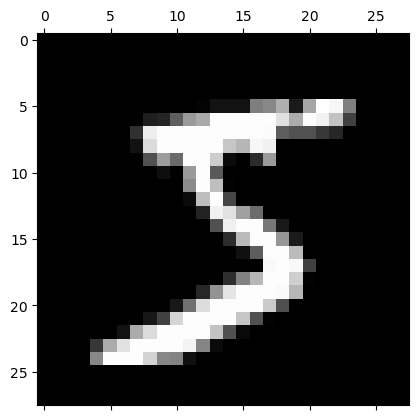

In [4]:
plt.gray()
plt.matshow(X_digits[0].reshape(28,28))
plt.show()

Nous souhaitons reconnaître ces chiffres en utilisant un réseau de neurones. Pour commencer, nous allons implémenter un réseau de neurones avec une seule couche pour effectuer cette tâche. Avant de se lancer, quelques questions se posent.

Quelle type de sortie allez-vous utiliser pour votre réseau de neurones (nombre de neurones de sortie, fonction d'activation) ?

*Réponse : nous allons avoir 10 sorties, et softmax 

Au TP précédent, vous avez utilisé la fonction de loss [`torch.nn.BCEloss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html). Celle-ci n'est pas adaptée à notre problème ; pouvez-vous déterminer pourquoi ?

*Réponse : non elle n'est pas adapté car il y a plusieur classe, il faut donc une fonciton une fonction qui puisse s'adapté a ce cas de figure, contrairement a torch.nn.BCEloss() qui ne prend que 2 y et 1-Y

En cherchant parmi les fonctions de loss de PyTorch, quelle(s) fonction(s) de loss semble(nt) convenir dans notre situation ? *Indication :* Il y a au moins deux choix possibles qui se rapprochent de ce qui a été vu au cours ; lisez bien ce qu'ils impliquent sur le choix de la dernière fonction d'activation.

*Réponse :* 
loss possible : torch.nn.CrossEntropyLoss() et lautre est nn.NLLLoss

Comme d'habitude, séparez vos données en un ensemble d'entraînement, un ensemble de validation, et un ensemble de test. On transforme aussi chaque pixel en un nombre entre $0$ et $1$ (ce qui est une forme de normalisation), et chaque image de taille $28 \times 28$ en un vecteur de taille $784$.

In [20]:
from sklearn.model_selection import train_test_split

m, w, h = X_digits.shape
X_temporary = X_digits.reshape(m, w * h).to(torch.float32) / 255. # On transforme chaque image en un vecteur
m, n = X.shape
print(m, n)

X_train , X_val_test  = train_test_split(X_temporary, test_size=0.2, random_state=42)
X_val, X_test = train_test_split(X_val_test, test_size=0.5, random_state=42)

y_train , y_val_test  = train_test_split(y_digits, test_size=0.2, random_state=42)
y_val, y_test = train_test_split(y_val_test, test_size=0.5, random_state=42)

print (X_train.shape)
print (X_val.shape)
print (X_test.shape)

print (y_train.shape)
print (y_val.shape)
print (y_test.shape)

60000 784
torch.Size([48000, 784])
torch.Size([6000, 784])
torch.Size([6000, 784])
torch.Size([48000])
torch.Size([6000])
torch.Size([6000])


Vous pouvez maintenant implémenter un réseau à une couche.

In [6]:
def initialize_single_layer():
    model = nn.Sequential(
        nn.Linear(784, 10)
    )
    return model

Entraînez ce réseau sur vos données d'entraînement, et testez-le sur vos données de validation. Vous devriez obtenir une accuracy sur les données de validation/test d'environ $90 \%$. Pour faire des tests rapides, n'hésitez pas à réduire la taille du jeu de données.

Notez que le format de sortie de votre réseau de neurones ne correspond pas directement au format des éléments du vecteur `y_digits`. En fonction de la documentation des fonctions utilisées, déterminez si cela est un problème.

*Réponse :* 

Vous pouvez utiliser l'optimizer `optim.Adam()`.

In [25]:
import time

def train(model, batch_size, optimizer, loss_function, X= X_train, y= y_train):
    
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_pred = model(X_batch)
        y_batch = y[i:i+batch_size]
        loss = loss_function(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    average_loss = loss_function(model(X), y).item()
    accuracy = (model(X).argmax(dim=1) == y).float().mean()
    return accuracy, average_loss


def train_mnist(model, nb_epoch=50, batch_size=50, X_train=X_train, y_train=y_train):
    optimizer = optim.Adam(model.parameters())
    
    loss = nn.CrossEntropyLoss()
    
    train_loss = []
    train_acc = []
    
    val_loss = []
    val_acc = []

    for epoch in range(nb_epoch):
        start_time = time.time()
        accuracy, average_loss = train(model, batch_size, optimizer , loss, X=X_train, y=y_train)
        epoch_time_train = time.time() - start_time
        
        train_acc.append( accuracy)
        train_loss.append( average_loss )
        
        tart_time = time.time()
        
        val_L = loss(model(X_val), y_val).item() 
        val_A =(model(X_val).argmax(dim=1) == y_val).float().mean() 
        
        val_loss.append(val_L)
        val_acc.append(val_A )
        
        epoch_time_val = time.time() - start_time
        
        
        print(f'Epoch {epoch+1}/{nb_epoch} - '
          f'Loss: {accuracy:.4f} - Accuracy: {average_loss:.4f} - '
          f'Time: {epoch_time_train:.2f} seconds - '
          f'Val Loss: {val_L:.4f} - Val Accuracy: {val_A:.4f} - '
          f'Time: {epoch_time_val:.2f} seconds')
    return train_loss, train_acc , val_loss , val_acc

In [26]:
model = initialize_single_layer()
train_loss, train_acc , val_loss , val_acc= train_mnist(model)

Epoch 1/50 - Loss: 0.9048 - Accuracy: 0.3509 - Time: 0.27 seconds - Val Loss: 0.3539 - Val Accuracy: 0.9040 - Time: 0.27 seconds
Epoch 2/50 - Loss: 0.9165 - Accuracy: 0.3046 - Time: 0.21 seconds - Val Loss: 0.3094 - Val Accuracy: 0.9133 - Time: 0.21 seconds
Epoch 3/50 - Loss: 0.9210 - Accuracy: 0.2860 - Time: 0.21 seconds - Val Loss: 0.2932 - Val Accuracy: 0.9180 - Time: 0.22 seconds
Epoch 4/50 - Loss: 0.9241 - Accuracy: 0.2754 - Time: 0.21 seconds - Val Loss: 0.2848 - Val Accuracy: 0.9205 - Time: 0.21 seconds
Epoch 5/50 - Loss: 0.9265 - Accuracy: 0.2682 - Time: 0.21 seconds - Val Loss: 0.2799 - Val Accuracy: 0.9208 - Time: 0.21 seconds
Epoch 6/50 - Loss: 0.9282 - Accuracy: 0.2630 - Time: 0.22 seconds - Val Loss: 0.2767 - Val Accuracy: 0.9217 - Time: 0.22 seconds
Epoch 7/50 - Loss: 0.9291 - Accuracy: 0.2589 - Time: 0.21 seconds - Val Loss: 0.2745 - Val Accuracy: 0.9223 - Time: 0.22 seconds
Epoch 8/50 - Loss: 0.9297 - Accuracy: 0.2555 - Time: 0.21 seconds - Val Loss: 0.2730 - Val Accura

Ajoutez à votre code plus haut une façon d'évaluer l'évolution de la loss au fur et à mesure des epochs. Affichez le graphique de l'évolution de la loss des données d'entraînement et des données de validation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


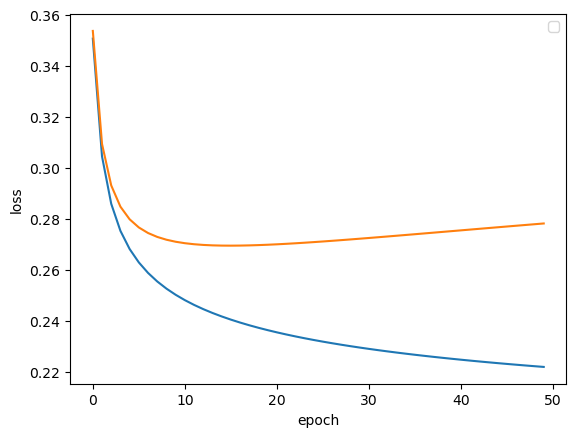

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


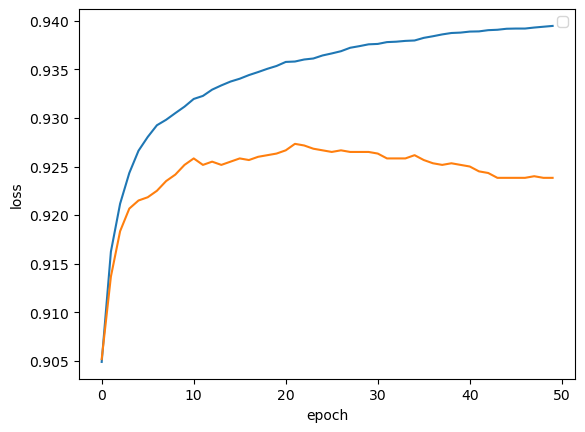

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Visualisation des poids

Quelle est le nombre de paramètres (poids et biais) de votre réseau à une couche ?

*Réponse :*
10 poids et 10 biais

Donnez une façon de visualiser les poids de votre modèle comme $10$ images (vous pouvez accéder aux poids d'une couche $i$ via `model[i].weight`).

<Figure size 640x480 with 0 Axes>

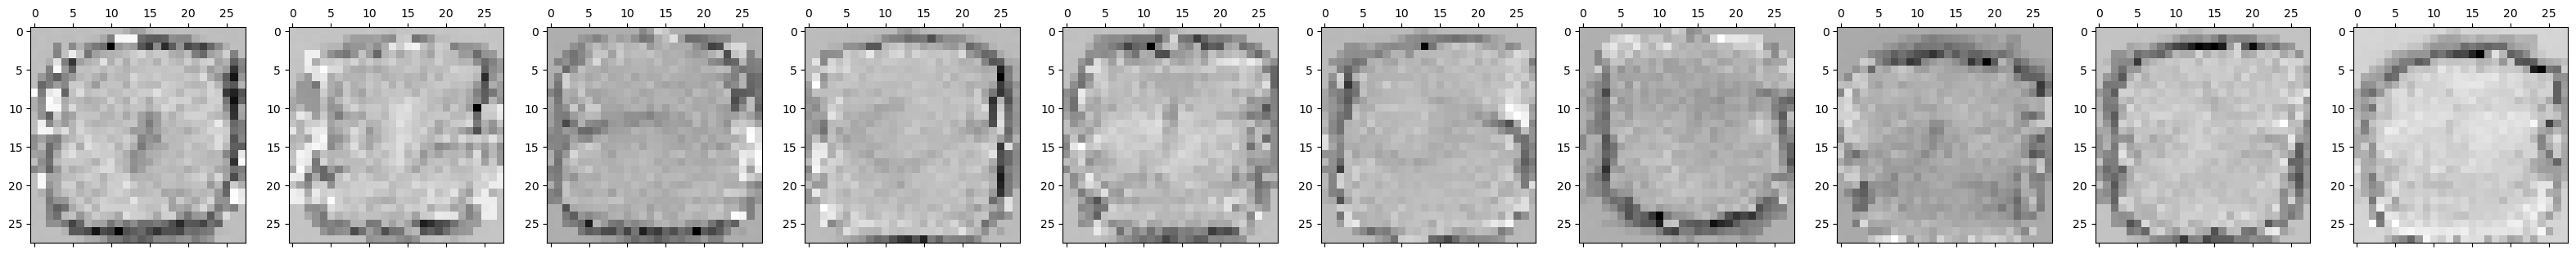

In [11]:
def display_weights_mnist(model):
    plt.gray()
    fig, axs = plt.subplots(1, 10, figsize=(40, 4))
    for i in range(10):
        axs[i].matshow(model[0].weight.data.numpy()[i].reshape(28, 28))

    plt.show()

display_weights_mnist(model)

Il est probablement difficile de donner du sens à ces images. Réentraînez votre réseau de neurones, mais en n'utilisant que $500$ données (au lieu de $60000$) et visualisez à nouveau les poids. Vous devriez deviner les $10$ chiffres dans les images. Comment expliquez-vous ce phénomène ?

*Réponse :*

torch.Size([511, 784])
torch.Size([511])
Epoch 1/50 - Loss: 0.5401 - Accuracy: 1.9496 - Time: 0.01 seconds - Val Loss: 1.9769 - Val Accuracy: 0.4862 - Time: 0.01 seconds
Epoch 2/50 - Loss: 0.6830 - Accuracy: 1.6661 - Time: 0.00 seconds - Val Loss: 1.7096 - Val Accuracy: 0.6478 - Time: 0.01 seconds
Epoch 3/50 - Loss: 0.7691 - Accuracy: 1.4381 - Time: 0.00 seconds - Val Loss: 1.4873 - Val Accuracy: 0.7347 - Time: 0.01 seconds
Epoch 4/50 - Loss: 0.8200 - Accuracy: 1.2587 - Time: 0.00 seconds - Val Loss: 1.3133 - Val Accuracy: 0.7730 - Time: 0.01 seconds
Epoch 5/50 - Loss: 0.8356 - Accuracy: 1.1187 - Time: 0.00 seconds - Val Loss: 1.1809 - Val Accuracy: 0.7878 - Time: 0.01 seconds
Epoch 6/50 - Loss: 0.8415 - Accuracy: 1.0082 - Time: 0.00 seconds - Val Loss: 1.0784 - Val Accuracy: 0.7957 - Time: 0.01 seconds
Epoch 7/50 - Loss: 0.8552 - Accuracy: 0.9194 - Time: 0.00 seconds - Val Loss: 0.9974 - Val Accuracy: 0.8042 - Time: 0.01 seconds
Epoch 8/50 - Loss: 0.8689 - Accuracy: 0.8468 - Time: 0.0

<Figure size 640x480 with 0 Axes>

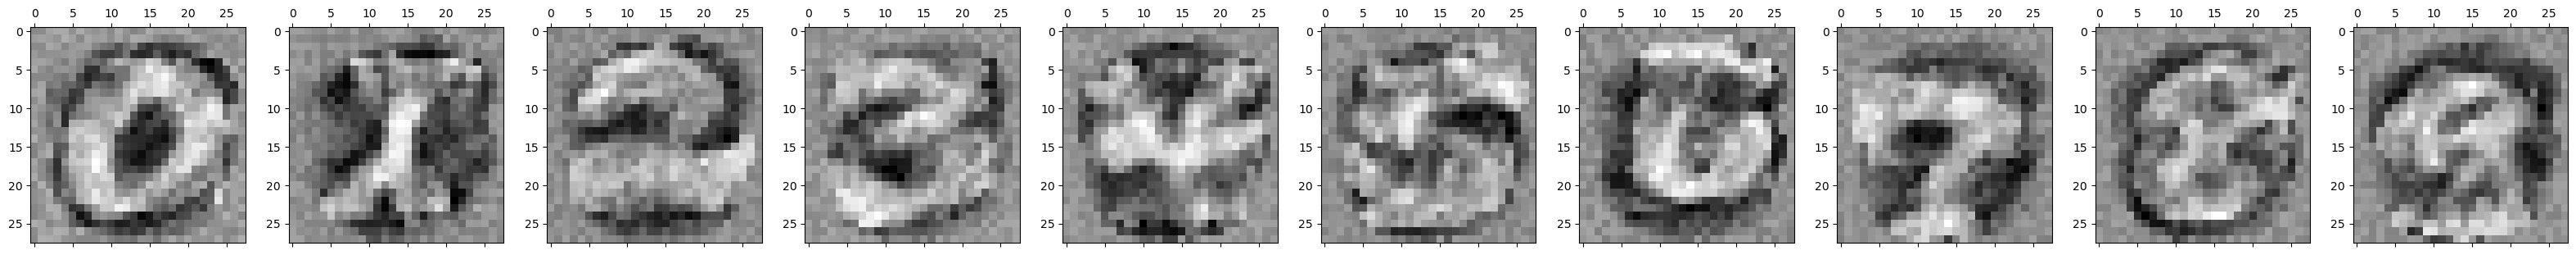

In [31]:
_ , X_train_overfiting  = train_test_split(X, test_size=0.0085, random_state=42)

_ , y_overfiting = train_test_split(y_digits, test_size=0.0085, random_state=42)

print (X_train_overfiting.shape)
print (y_overfiting.shape)

model_overfiting = initialize_single_layer()
train_loss, train_acc , val_loss , val_acc= train_mnist(model_overfiting, nb_epoch=50, batch_size=50, X_train=X_train_overfiting, y_train=y_overfiting)

display_weights_mnist(model_overfiting)


## De meilleurs résultats

Ajoutez une ou deux couches à votre réseau pour essayer d'obtenir une meilleure accuracy. Utilisez la fonction d'activation `nn.ReLU()` sur les couches intermédiaires. Avec $2$ ou $3$ couches, il est possible d'arriver à une accuracy $> 95 \%$. Réutilisez votre code ci-dessus pour afficher les poids de la première couche cachée et donnez une intuition rapide de ce que vous voyez (ne passez pas trop de temps sur cette question).

*Réponse :*

In [34]:
def initialize_multiple_layer():
    model = nn.Sequential(
        nn.Linear(784, 256),
        nn.ReLU(),
        nn.Linear(256, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )
    return model

model_best = initialize_multiple_layer()
train_loss, train_acc , val_loss , val_acc= train_mnist(model_best)

Epoch 1/50 - Loss: 0.9590 - Accuracy: 0.1404 - Time: 0.94 seconds - Val Loss: 0.1503 - Val Accuracy: 0.9547 - Time: 0.95 seconds
Epoch 2/50 - Loss: 0.9742 - Accuracy: 0.0866 - Time: 0.87 seconds - Val Loss: 0.1094 - Val Accuracy: 0.9652 - Time: 0.88 seconds
Epoch 3/50 - Loss: 0.9802 - Accuracy: 0.0645 - Time: 0.87 seconds - Val Loss: 0.0972 - Val Accuracy: 0.9685 - Time: 0.88 seconds
Epoch 4/50 - Loss: 0.9846 - Accuracy: 0.0494 - Time: 0.87 seconds - Val Loss: 0.0918 - Val Accuracy: 0.9710 - Time: 0.88 seconds
Epoch 5/50 - Loss: 0.9884 - Accuracy: 0.0365 - Time: 0.89 seconds - Val Loss: 0.0840 - Val Accuracy: 0.9748 - Time: 0.90 seconds
Epoch 6/50 - Loss: 0.9886 - Accuracy: 0.0327 - Time: 0.87 seconds - Val Loss: 0.0918 - Val Accuracy: 0.9742 - Time: 0.88 seconds
Epoch 7/50 - Loss: 0.9903 - Accuracy: 0.0274 - Time: 0.87 seconds - Val Loss: 0.0954 - Val Accuracy: 0.9750 - Time: 0.88 seconds
Epoch 8/50 - Loss: 0.9938 - Accuracy: 0.0187 - Time: 0.87 seconds - Val Loss: 0.0922 - Val Accura

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


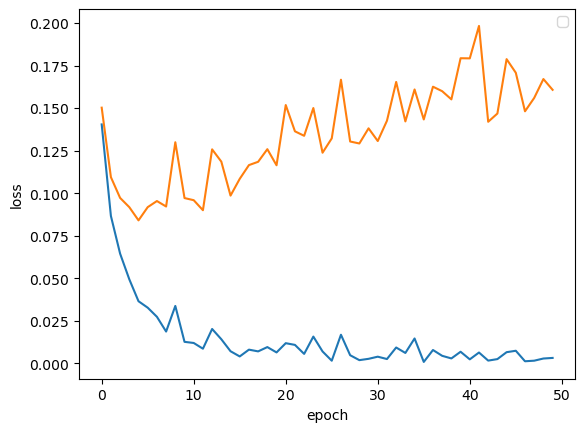

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


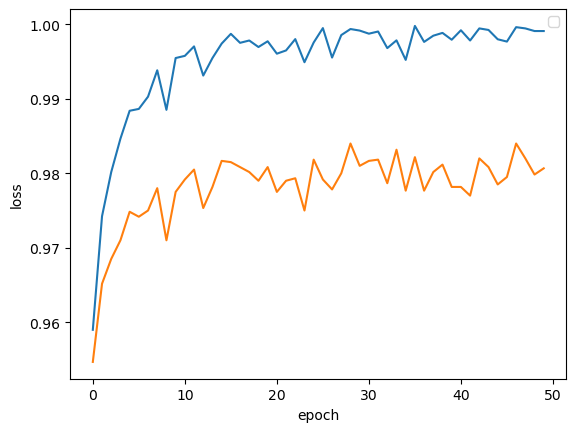

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Visualisation des gradients

En plus de l'affichage des poids, vous pouvez aussi afficher les gradients de votre modèle (qui sont stockés dans `model[i].weight.grad` pour la couche $i$). Comme pour les poids, affichez les gradients de votre modèle après entraînement (le code devrait être très proche de votre code pour visualiser les poids).

<Figure size 640x480 with 0 Axes>

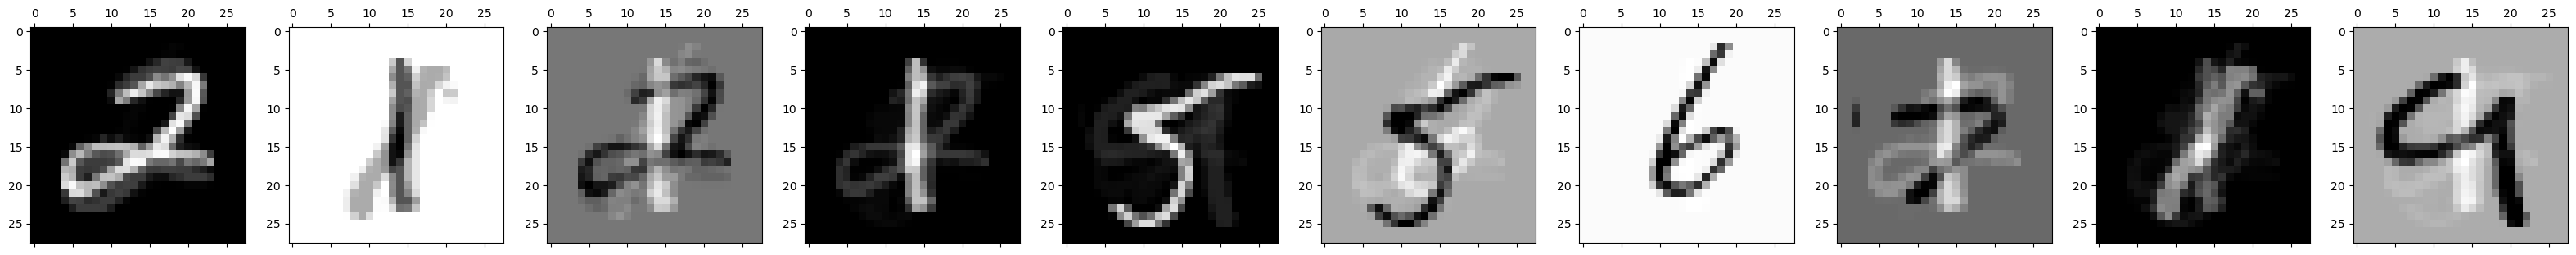

In [37]:
def display_grad_mnist(model):
    plt.gray()
    fig, axs = plt.subplots(1, 10, figsize=(40, 4))
    for i in range(10):
        axs[i].matshow(model[0].weight.grad.numpy()[i].reshape(28, 28))
    plt.show()

display_grad_mnist(model)

Sur les modèles avec au moins une couche cachée, il est possible que certains neurones de la première couche cachée aient des poids qui ont l'air complètement aléatoires, comme sur l'image ci-dessous.
 
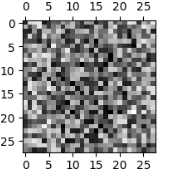

(Si vous n'avez pas de tel neurone, relancez plusieurs fois votre entraînement pour essayer d'en observer un).

En observant un lien entre ces neurones particuliers (dits "morts") et leur gradient, émettez une hypothèse sur la cause de ces neurones morts. Utilisez dans votre explication une particularité de la fonction d'activation ReLU.

*Réponse :*

Le fait que relu soit a 0 lorsqu'on est negatif, il ne peut pas savoir le gradient ne sait pas comment s'ameliorer, il faut donc utiliser leakyrelu

Pour mitiger le problème des neurones morts, on peut utiliser la fonction d'activation `nn.LeakyReLU()`. Celle-ci a des performances moindres par rapport à ReLU, mais atténue le problème des neurones morts. À partir de sa documentation, expliquez pourquoi les neurones morts arrivent moins fréquemment avec LeakyReLU.

*Réponse :*
Car en donnant une pente, le gradient c'est si il se rapproche ou non de la bonne valeurs.

Remplacez ReLU par LeakyReLU dans votre réseau précédent, et observez qu'aucun neurone n'est mort.

Epoch 1/50 - Loss: 0.9571 - Accuracy: 0.1457 - Time: 0.90 seconds - Val Loss: 0.1546 - Val Accuracy: 0.9547 - Time: 0.91 seconds
Epoch 2/50 - Loss: 0.9741 - Accuracy: 0.0862 - Time: 0.92 seconds - Val Loss: 0.1074 - Val Accuracy: 0.9660 - Time: 0.93 seconds
Epoch 3/50 - Loss: 0.9822 - Accuracy: 0.0576 - Time: 0.87 seconds - Val Loss: 0.0904 - Val Accuracy: 0.9713 - Time: 0.88 seconds
Epoch 4/50 - Loss: 0.9875 - Accuracy: 0.0410 - Time: 0.98 seconds - Val Loss: 0.0852 - Val Accuracy: 0.9742 - Time: 0.99 seconds
Epoch 5/50 - Loss: 0.9897 - Accuracy: 0.0328 - Time: 0.91 seconds - Val Loss: 0.0886 - Val Accuracy: 0.9742 - Time: 0.92 seconds
Epoch 6/50 - Loss: 0.9898 - Accuracy: 0.0327 - Time: 0.89 seconds - Val Loss: 0.0975 - Val Accuracy: 0.9740 - Time: 0.90 seconds
Epoch 7/50 - Loss: 0.9921 - Accuracy: 0.0239 - Time: 0.86 seconds - Val Loss: 0.0963 - Val Accuracy: 0.9742 - Time: 0.87 seconds
Epoch 8/50 - Loss: 0.9950 - Accuracy: 0.0150 - Time: 0.95 seconds - Val Loss: 0.0897 - Val Accura

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 50/50 - Loss: 0.9994 - Accuracy: 0.0023 - Time: 0.87 seconds - Val Loss: 0.1714 - Val Accuracy: 0.9797 - Time: 0.88 seconds


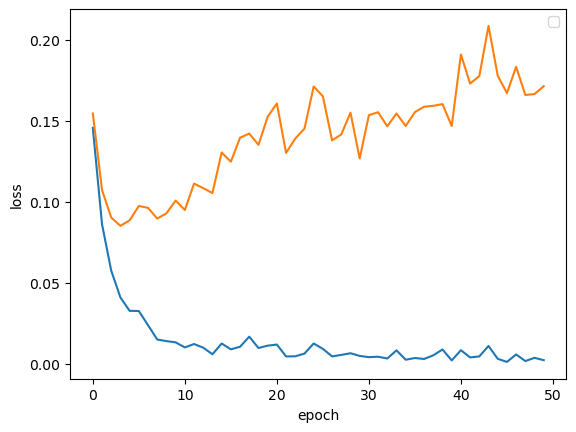

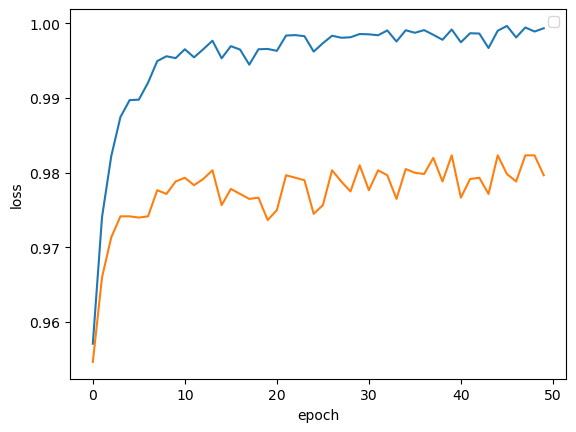

In [39]:
def initialize_multiple_layer_leaky():
    model = nn.Sequential(
        nn.Linear(784, 256),
        nn.LeakyReLU(negative_slope=0.2),
        nn.Linear(256, 64),
        nn.LeakyReLU(negative_slope=0.02),
        nn.Linear(64, 10)
    )
    return model

model_best = initialize_multiple_layer()
train_loss, train_acc , val_loss , val_acc= train_mnist(model_best)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Conclusion

Quand les réseaux de neurones ne donnent pas les résultats attendus, il peut être très utile de visualiser les loss, accuracy, neurones, gradients... pour les débugger. Pour cela, il est nécessaire de comprendre comment ils marchent et d'avoir une idée de comment le gradient est calculé. Un outil puissant pour visualiser des statistiques sur des réseaux de neurones est [TensorBoard](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html).